In [1]:
print("Hello Jupyter")

Hello Jupyter


In [2]:
import pandas as pd
print(pd.__version__)

1.2.3


In [3]:
import matplotlib
print(matplotlib.__version__)

import matplotlib.pyplot as plt

3.3.4


In [4]:
import numpy as np
print(np.__version__)

1.19.2


In [5]:
df = pd.read_csv('data/datafiles_to_2021_04_01.csv')
df.fillna('', inplace=True)
df.head()

,doi,pub_date,filename,file_format,num_bytes,total_downloads
0,10.5072/FK2IDB-1754329_V1,2017-01-09,DatabaseDesignWorkshopSlides.pdf,application/pdf,2373805,47
1,10.5072/FK2IDB-1754329_V1,2017-01-09,information_system_contingency_plan_template.docx,application/msword,975762,136
2,10.5072/FK2IDB-1754329_V1,2017-01-09,face.jpeg,image/jpeg,3449,116
3,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2011.zip,application/zip,1335691587,463
4,10.13012/B2IDB-4900670_V1,2016-06-23,links.csv,text/csv,42001684,723


In [6]:
# gb is number of bytes in a gigabyte
gb = 1024**3

In [7]:
conditions = [
    (df['num_bytes'] <= 4*gb),
    (df['num_bytes'] > 4*gb) & (df['num_bytes'] <= 15*gb),
    (df['num_bytes'] > 15*gb) & (df['num_bytes'] <= 50*gb),
    (df['num_bytes'] > 50*gb)
]
outputs = [
    '0-4', '4-15', '15-50', '50+'
]
df['size_code'] = np.select(conditions, outputs, 'Other')
df.head()

,doi,pub_date,filename,file_format,num_bytes,total_downloads,size_code
0,10.5072/FK2IDB-1754329_V1,2017-01-09,DatabaseDesignWorkshopSlides.pdf,application/pdf,2373805,47,0-4
1,10.5072/FK2IDB-1754329_V1,2017-01-09,information_system_contingency_plan_template.docx,application/msword,975762,136,0-4
2,10.5072/FK2IDB-1754329_V1,2017-01-09,face.jpeg,image/jpeg,3449,116,0-4
3,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2011.zip,application/zip,1335691587,463,0-4
4,10.13012/B2IDB-4900670_V1,2016-06-23,links.csv,text/csv,42001684,723,0-4


In [8]:
labels, counts = np.unique(df['size_code'], return_counts=True)
print(labels)
print(counts)
#explode = (0.1, 0, 0)
#fig1, ax1 = plt.subplots()
#ax1.pie(counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

['0-4' '15-50' '4-15' '50+']
[4444   65   82   16]


In [9]:
file_size_column = df.loc[:,'num_bytes']
file_sizes = file_size_column.values

In [10]:
print(file_sizes)
gb = 1024**3
print(gb)

[   2373805     975762       3449 ...       2193       8484 3960605620]
1073741824


In [11]:
np.histogram(file_sizes, bins=(0.0, gb*4, gb*15, gb*50, np.inf))

(array([4444,   82,   65,   16]),
 array([0.00000000e+00, 4.29496730e+09, 1.61061274e+10, 5.36870912e+10,
                   inf]))

/usr/local/Caskroom/miniconda/base/envs/crunch-env/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


(array([4444.,   82.,   65.,   16.]),
 array([0.00000000e+00, 4.29496730e+09, 1.61061274e+10, 5.36870912e+10,
                   inf]),
 <BarContainer object of 4 artists>)

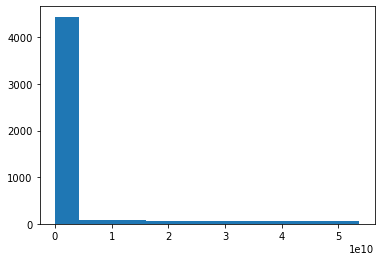

In [12]:
plt.hist(file_sizes, bins=(0.0, gb*4, gb*15, gb*50, np.inf))

In [13]:
df["pub_date"].max()

'2022-01-01'

In [14]:
df["pub_date"].min()

'2016-04-29'

In [15]:
print(np.sum(file_sizes <= gb*4))

4444


In [16]:
print(np.sum(file_sizes > gb*4))

163


In [17]:
print(np.sum(file_sizes > gb*50))

16


In [18]:
((gb*4 < file_sizes) & (file_sizes <= gb*15)).sum()

82

In [19]:
((gb*15 < file_sizes) & (file_sizes <= gb*50)).sum()

65

In [20]:
(gb*50 < file_sizes).sum()

16

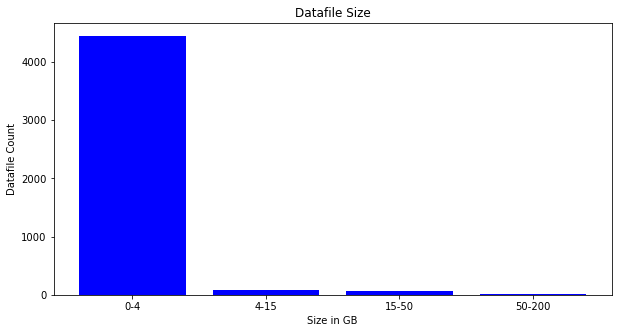

In [21]:
f, ax = plt.subplots(figsize=(10,5))
x=["0-4","4-15", "15-50", "50-200"]
count=[4444, 82, 65, 16]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, count, color='blue')
plt.xlabel("Size in GB")
plt.ylabel("Datafile Count")
plt.title("Datafile Size")

plt.xticks(x_pos, x)

plt.show()


In [22]:
file_sizes[((gb*4 < file_sizes) & (file_sizes <= gb*15))].sum()

886987815856

In [23]:
a = file_sizes[(gb*4 >= file_sizes) ].sum()
b = file_sizes[(gb*4 < file_sizes) ].sum()
print(a/gb)
print(b/gb)
print((a+b)/gb)

1026.0587242413312
5982.069452524185
7008.128176765516


In [24]:
len(file_sizes)

4607

In [25]:
4607-4444

163

<bound method Axes.plot of <AxesSubplot:title={'center':'File Sizes 2016-04-01 to 2021-04-01'}, xlabel='Publication Date', ylabel='File Size (in GB)'>>

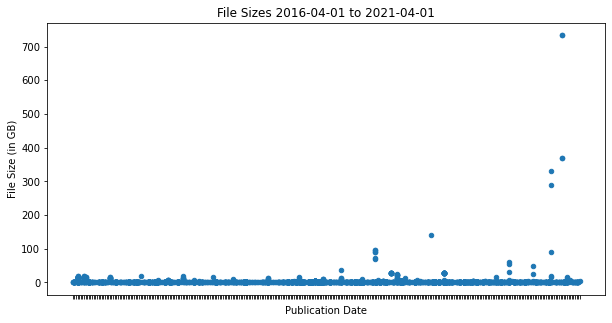

In [26]:
df["size_in_gb"] = df["num_bytes"]/gb

ax = df.plot.scatter(figsize=(10,5), x="pub_date", y="size_in_gb")
ax.set_ylabel("File Size (in GB)")
ax.set_xlabel("Publication Date")
ax.set_title("File Sizes 2016-04-01 to 2021-04-01")
# Turn off tick labels
#ax.set_yticklabels([])
ax.set_xticklabels([])
ax.plot



In [27]:
file_type_column = df.loc[:,'file_format']
file_types = file_type_column.values

In [28]:
np.unique(file_types)

array(['', 'application/msword',
       'application/netcdf, application/x-netcdf',
       'application/octet-stream', 'application/pdf', 'application/rtf',
       'application/vnd.ms-excel',
       'application/vnd.oasis.opendocument.spreadsheet',
       'application/x-7z-compressed', 'application/x-executable',
       'application/x-gzip', 'application/x-hdf',
       'application/x-rar-compressed', 'application/x-tar',
       'application/x-xz', 'application/zip', 'image/bmp', 'image/gif',
       'image/jpeg', 'image/png', 'image/tiff', 'text/csv', 'text/html',
       'text/html; charset=ISO-8859-7', 'text/html; charset=KOI8-R',
       'text/html; charset=windows-1252', 'text/plain', 'text/x-asm',
       'text/x-c', 'text/x-c++', 'text/x-java', 'text/x-perl',
       'text/x-python', 'text/x-shellscript', 'text/xml',
       'video/quicktime', 'video/x-msvideo'], dtype=object)

In [29]:
format_groups = df.groupby(by=["file_format"]).sum()
format_groups

,num_bytes,total_downloads,size_in_gb
file_format,,,
,85116433133,2004,79.270856
application/msword,1352829,3121,0.001260
"application/netcdf, application/x-netcdf",3379339247024,17750,3147.254928
application/octet-stream,249273351065,56653,232.153899
application/pdf,121616192,13880,0.113264
application/rtf,196753,319,0.000183
application/vnd.ms-excel,532487639,15937,0.495918
application/vnd.oasis.opendocument.spreadsheet,1493886,1292,0.001391
application/x-7z-compressed,4955957097,973,4.615595


In [30]:
unique_elements, counts_elements = np.unique(file_types, return_counts=True)
print(unique_elements)
print(counts_elements)

['' 'application/msword' 'application/netcdf, application/x-netcdf'
 'application/octet-stream' 'application/pdf' 'application/rtf'
 'application/vnd.ms-excel'
 'application/vnd.oasis.opendocument.spreadsheet'
 'application/x-7z-compressed' 'application/x-executable'
 'application/x-gzip' 'application/x-hdf' 'application/x-rar-compressed'
 'application/x-tar' 'application/x-xz' 'application/zip' 'image/bmp'
 'image/gif' 'image/jpeg' 'image/png' 'image/tiff' 'text/csv' 'text/html'
 'text/html; charset=ISO-8859-7' 'text/html; charset=KOI8-R'
 'text/html; charset=windows-1252' 'text/plain' 'text/x-asm' 'text/x-c'
 'text/x-c++' 'text/x-java' 'text/x-perl' 'text/x-python'
 'text/x-shellscript' 'text/xml' 'video/quicktime' 'video/x-msvideo']
[ 168   22  171  449   67    5  130    3    5    1  370  333   14   11
    6  484    2    1    3    5  114  592   15    1    2    1 1560    1
    3    4   24    3   11    8    5   11    2]


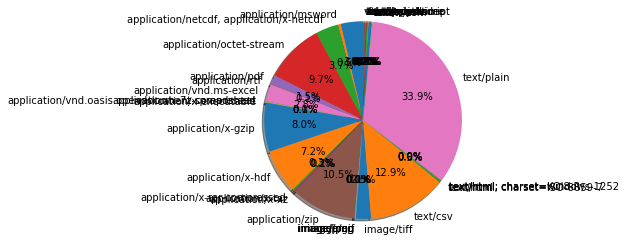

In [31]:
fig1, ax1 = plt.subplots()
ax1.pie(counts_elements, labels=unique_elements, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [32]:
text_formats =  ['text/html; charset=KOI8-R',
 'text/html; charset=windows-1252', 'text/plain', 'text/x-asm', 'text/x-c'
 'text/x-c++', 'text/x-java', 'text/x-perl', 'text/x-python'
 'text/x-shellscript', 'text/xml']
print(len(text_formats))

9


In [33]:
archive_formats = ['application/x-7z-compressed',
 'application/x-gzip', 'application/x-rar-compressed'
 'application/x-tar', 'application/x-xz', 'application/zip']
print(len(archive_formats))

5


In [34]:
#print('text/x-perl' in text_formats)
#print(len([x for x in df['file_format'] if x is not None]))
#print(df['file_format'].head())
#df['file_format'] in text_formats
#s = df['file_format']
#s[s.apply(type) == str]

In [35]:
# s2 = s.map(lambda x: 'this is a string {}'.format(x), na_action=None)

s = df['file_format'].map(lambda x: x in text_formats, na_action=None)
s.sum()

1596

In [36]:
conditions = [
    np.isin(df['file_format'], text_formats),
    np.isin(df['file_format'], archive_formats)
]
outputs = [
    'Text', 'Archive'
]
df['format_code'] = np.select(conditions, outputs, 'Other')
df.head()


,doi,pub_date,filename,file_format,num_bytes,total_downloads,size_code,size_in_gb,format_code
0,10.5072/FK2IDB-1754329_V1,2017-01-09,DatabaseDesignWorkshopSlides.pdf,application/pdf,2373805,47,0-4,0.002211,Other
1,10.5072/FK2IDB-1754329_V1,2017-01-09,information_system_contingency_plan_template.docx,application/msword,975762,136,0-4,0.000909,Other
2,10.5072/FK2IDB-1754329_V1,2017-01-09,face.jpeg,image/jpeg,3449,116,0-4,0.000003,Other
3,10.13012/B2IDB-4900670_V1,2016-06-23,travel_times_2011.zip,application/zip,1335691587,463,0-4,1.243960,Archive
4,10.13012/B2IDB-4900670_V1,2016-06-23,links.csv,text/csv,42001684,723,0-4,0.039117,Other


In [37]:
(df['format_code']=='Other').sum()

2146

In [38]:
list(zip(*np.unique(df['format_code'], return_counts=True)))

[('Archive', 865), ('Other', 2146), ('Text', 1596)]

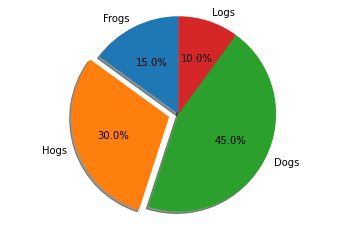

In [39]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

['Archive' 'Other' 'Text']
[ 865 2146 1596]


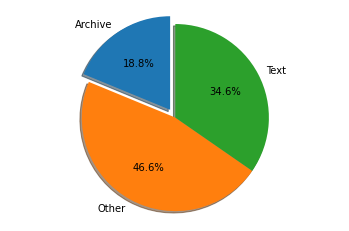

In [40]:
labels, counts = np.unique(df['format_code'], return_counts=True)
print(labels)
print(counts)
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(counts, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [41]:
df_by_format = df.groupby(['format_code']).sum()
df_by_format

,num_bytes,total_downloads,size_in_gb
format_code,,,
Archive,3265091751133,143623,3040.853656
Other,4095490152203,234206,3814.222433
Text,164338428010,263211,153.052088


In [42]:
list(df_by_format.columns)

['num_bytes', 'total_downloads', 'size_in_gb']

In [43]:
df_by_format.axes

[Index(['Archive', 'Other', 'Text'], dtype='object', name='format_code'),
 Index(['num_bytes', 'total_downloads', 'size_in_gb'], dtype='object')]

In [44]:
df_by_format.axes[0]

Index(['Archive', 'Other', 'Text'], dtype='object', name='format_code')

In [45]:
type(df_by_format.axes[0])

pandas.core.indexes.base.Index

In [46]:
labels = list(df_by_format.axes[0])
print(labels)

['Archive', 'Other', 'Text']


In [47]:
counts = list(df_by_format['total_downloads'])
print(counts)

[143623, 234206, 263211]


In [48]:
explode = (0.1, 0, 0)

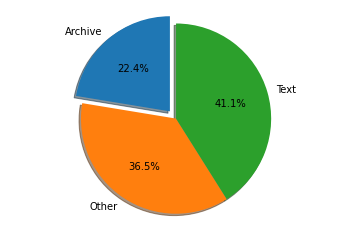

In [49]:
fig1, ax1 = plt.subplots()
ax1.pie(counts, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()